In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [9]:
df = pd.read_csv('../data/oasis_cross-sectional.csv')

In [4]:
df['CDR'].fillna(0, inplace=True)
labels = df['CDR']!=0

In [5]:
tra = []
for path in df['ID']:
    path1 = '../data/Oasis_Data/' + path + '/PROCESSED/MPRAGE/T88_111/'
    for img in os.listdir(path1):
        if img.endswith('t88_gfc_tra_90.gif'):
            tra.append(plt.imread(path1+img))
tra = np.array(tra)

In [6]:
sag = []
for path in df['ID']:
    path1 = '../data/Oasis_Data/' + path + '/PROCESSED/MPRAGE/T88_111/'
    for img in os.listdir(path1):
        if img.endswith('t88_gfc_sag_95.gif'):
            sag.append(plt.imread(path1+img))
sag = np.array(sag)

In [7]:
cor = []
for path in df['ID']:
    path1 = '../data/Oasis_Data/' + path + '/PROCESSED/MPRAGE/T88_111/'
    for img in os.listdir(path1):
        if img.endswith('t88_gfc_cor_110.gif'):
            cor.append(plt.imread(path1+img))
cor = np.array(cor)

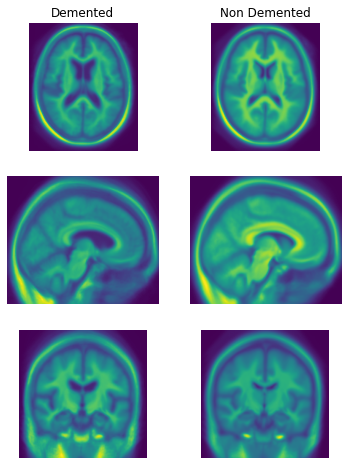

In [33]:
fig, axes = plt.subplots(3,2, figsize=(6,8))
axes[0,0].imshow(np.mean(tra[labels], axis=0))
axes[0,1].imshow(np.mean(tra[labels==False], axis=0))
axes[1,0].imshow(np.mean(sag[labels], axis=0))
axes[1,1].imshow(np.mean(sag[labels==False], axis=0))
axes[2,0].imshow(np.mean(cor[labels], axis=0))
axes[2,1].imshow(np.mean(cor[labels==False], axis=0))

axes[0,0].set_title('Demented')
axes[0,1].set_title('Non Demented')
for a in axes:
    for ax in a:
        ax.axis('off')

In [8]:
pca = PCA(n_components=10)
tra_trans = pca.fit_transform(tra.reshape(436,36608))

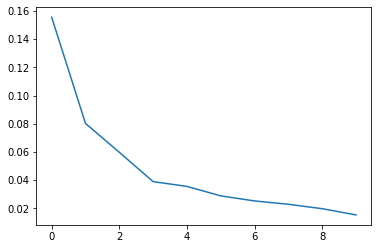

In [9]:
plt.plot(pca.explained_variance_ratio_)

In [10]:
tra_red = pca.inverse_transform(tra_trans).reshape(436,208,176)

In [11]:
tra2 = tra.reshape(436,36608).reshape(436,208,176)

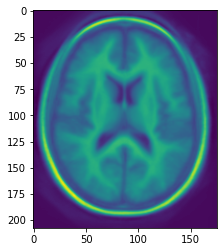

In [16]:
plt.imshow(tra_red[3])

In [11]:
import nibabel as nib

In [12]:
img = nib.load('../data/Oasis_Data/OAS1_0001_MR1/PROCESSED/MPRAGE/T88_111/OAS1_0001_MR1_mpr_n4_anon_111_t88_gfc.img')
img.shape

(176, 208, 176, 1)

In [18]:
img = img.get_fdata()[:,:,:,0]
img.shape

(176, 208, 176)

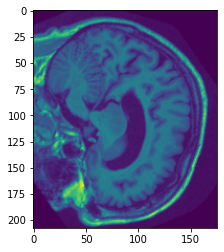

In [19]:
plt.imshow(img[100])